In [1]:
import sys
import numpy as np
import random
import math
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def appenddata(d):
    x = d[0]
    y = d[1]
    d.append(x*x)
    d.append(y*y)
    d.append(x*y)
    d.append(1)

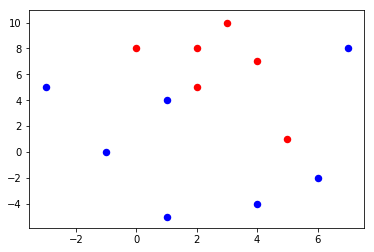

In [3]:
points = [
    [2, 5],
    [5, 1],
    [7, 8],
    [1, -5],
    [-3, 5],
    [6, -2],
    [-1, 0],
    [2, 8],
    [3, 10],
    [4, 7],
    [0, 8],
    [1, 4],
    [4,-4]
]

for p in points:
    appenddata(p)

X = np.array(points)

y = np.array([1,1,-1,-1,-1,-1,-1,1,1,1,1,-1,-1])

for d, sample in enumerate(X):
    if y[d] == -1:
        plt.scatter(sample[0], sample[1], s=120, marker=".", linewidths=2,c="blue")
    else:
        plt.scatter(sample[0], sample[1], s=120, marker=".", linewidths=2,c="red")        

In [4]:
def update_weights(X,Y,learning_rate,epochs):
    w = np.random.rand(len(X[0]))
    
    for epoch in range(1, epochs):
        for i, x in enumerate(X):
            if Y[i] * np.dot(X[i], w) < 1:
                w = w + learning_rate * X[i] * Y[i] + (-2  * (1 / epoch) * w)
            else:
                w = w + learning_rate * (-2 * (1 / epoch) * w)
        if epoch % 5000 == 0:
            sys.stdout.write("\r{:.2f} %".format(100*epoch/epochs))
            sys.stdout.flush()
            learning_rate *=0.99
            
            
    sys.stdout.write("\r100.00 %")
    sys.stdout.flush()
    return w

In [5]:
w = update_weights(X, y, 1, 1000000)

100.00 %

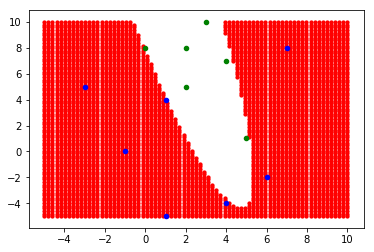

In [6]:
x = np.linspace(-5,10,75)
xx = np.linspace(-5,10,75)
points = []
for i in x:
    for j in xx:
        points.append([i,j])
for p in points:
    appenddata(p)
for x in points:    
    label = np.dot(np.array(x), w)
    if label < 1:
        plt.scatter(x[0], x[1], s=20, marker=".", linewidth=2, c="r")
        

for d, sample in enumerate(X):
    if y[d] == -1:
        plt.scatter(sample[0], sample[1], s=50, marker=".", linewidth=2, c="b")
    else:
        plt.scatter(sample[0], sample[1], s=50, marker=".", linewidth=2, c="g")

plt.show()